### K-Nearest Neighbor (KNN)
- find the nearest neighbor of a certain datapoint 
    - green or red
    - calculates the **Euclidean distance** btwn one point to another, then assigns label of unobserved data based on labels or nearest observed data points -> identifies the neighbors
    - smallest distance = the neighbors
    - represents each data point in a n-dimensional space (num. of features = dimension, ie data has three feathres = 3D plane)
    - NOT IDEAL FOR CATEGORICAL VAR.

### Using KNN to build prediction model

In [1]:
# Import the libraries 
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

# load the data
iris = datasets.load_iris()
np_data = iris['data']
np_target = iris['target']

print(np_data.shape)
print(np_target.shape)

# Combine data and target into a DataFrame
np_d = np.concatenate((np_data, np_target.reshape(-1,1)), axis = 1)
df=pd.DataFrame(data= np_d, columns= iris['feature_names'] + ['target'])
print(df.head(5))

(150, 4)
(150,)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


### Exploratory Data Analysis
- look at the histogram to see the distribution of the numeric data

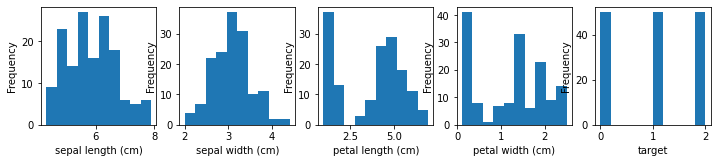

In [2]:
# Histogram for all numeric features
fig = plt.figure(figsize=(12, 10))
i=0
for column in df:
    sub=fig.add_subplot(4,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

#### Numerical Features v. Target - Box plot
- shows us the difference between the groups for each variable
- the most variance = most ideal variable to predict with
- no overlap is good (for the boxplots)

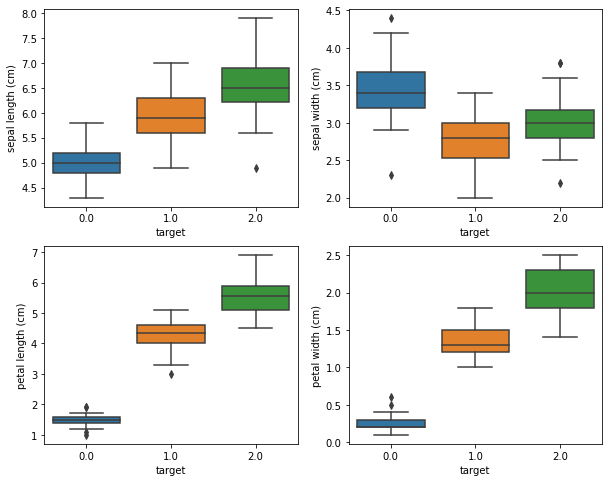

In [4]:
import seaborn as sns
num_list=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
fig=plt.figure(figsize=(10, 8))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,2,i+1)
    sns.boxplot(x='target',y=column, data=df)
# the petals are the most ideal to predict with since they have high sig. diff. and less overlap

### Use ANOVA & Correlation Coefficients to Select Features
- choose the features w/ highest F-scores and no correlations btwn each other

In [7]:
# ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
x = df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df.loc[:, 'target']


fs = SelectKBest(score_func=f_classif, k='all')  # call the method
FeaturesS = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)
print(FeaturesS.scores_)    # print out the scores 
print(FeaturesS.pvalues_)

# Correlation Coefficients
print(df.corr())

# chose petal length width as the predictor since it has the highest f-score
# also chose sepal width since has highest correl. w/ petal length

[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
[0. 0. 0. 0.]
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


### Feature Scaling - Normalize the Variables
- look at the histogram and box plots for chosen prediction variables -> we must normalize this data
- important since k-nearest neighbor algorithm relies on the x-range
- if x-ranges between the variables is varied, must normalize this to obtain an **accurate Euclidean distance**

#### Use MinMaxScaler for Normalization
- set a min and max

In [11]:
# identify the features 
x_final = df.loc[:, ['sepal width (cm)', 'petal length (cm)']]

# import libraries
from sklearn.preprocessing import MinMaxScaler

# normalize
nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final) 
x_scaled

# notice the min and max of the x for these two features

array([[0.625     , 0.06779661],
       [0.41666667, 0.06779661],
       [0.5       , 0.05084746],
       [0.45833333, 0.08474576],
       [0.66666667, 0.06779661],
       [0.79166667, 0.11864407],
       [0.58333333, 0.06779661],
       [0.58333333, 0.08474576],
       [0.375     , 0.06779661],
       [0.45833333, 0.08474576],
       [0.70833333, 0.08474576],
       [0.58333333, 0.10169492],
       [0.41666667, 0.06779661],
       [0.41666667, 0.01694915],
       [0.83333333, 0.03389831],
       [1.        , 0.08474576],
       [0.79166667, 0.05084746],
       [0.625     , 0.06779661],
       [0.75      , 0.11864407],
       [0.75      , 0.08474576],
       [0.58333333, 0.11864407],
       [0.70833333, 0.08474576],
       [0.66666667, 0.        ],
       [0.54166667, 0.11864407],
       [0.58333333, 0.15254237],
       [0.41666667, 0.10169492],
       [0.58333333, 0.10169492],
       [0.625     , 0.08474576],
       [0.58333333, 0.06779661],
       [0.5       , 0.10169492],
       [0.

### Build a KNN Classifier

#### Build KNN Model 

In [13]:
# check the effect of changing the k value
# fit the model
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2 )  

# The default value for metric and p are ‘minkowski’ and 2, which means using the Euclidean distance. These two parameters could be skipped. 
classifier.fit(x_scaled, y) 

KNeighborsClassifier(n_neighbors=1)

#### Make Predictions for ACH Points on the Coordinate
- use mesh grid

In [15]:
# make predictions for each of the points in xx, yy
xx, yy = np.meshgrid(np.arange(start = 0, stop = 1.01, step=0.01),np.arange(start=0, stop = 1.01, step = 0.01)) 
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

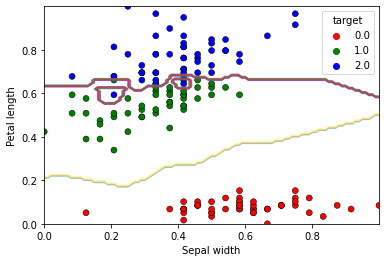

In [24]:
#---draw the result using a color plot---
plt.contour(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
sns.scatterplot(
        x=x_scaled[:, 0],
        y=x_scaled[:, 1],
        hue=y,
        palette=['red', 'green', 'blue'],
        alpha=1.0,
        edgecolor="black",
    )

plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.xticks(np.arange(0, 1, step=0.2))
plt.yticks(np.arange(0, 1, step=0.2))
plt.show()

# goal is to identify species for every point on the graph
# this is not accurate bc it will vary the k value, which could change the prediction based on outliers, mislabeling, etc.

In [17]:
# Check the effect of changing the k value of the training points
# define the formula to plug in k value

def plot_knn(k):
    from sklearn.neighbors import KNeighborsClassifier  
    classifier= KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(x_scaled, y) 
    
    #---make predictions for each of the points in xx,yy---
    xx, yy = np.meshgrid(np.arange(start = 0, stop = 1.01, step=0.01),np.arange(start=0, stop = 1.01, step = 0.01))  
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Accent, alpha=0.8)

    #---plot the training points---
    sns.scatterplot(
            x=x_scaled[:, 0],
            y=x_scaled[:, 1],
            hue=y,
            palette=['red', 'green', 'blue'],
            alpha=1.0,
            edgecolor="black",
        )

    plt.xlabel('Sepal width')
    plt.ylabel('Petal length')
    plt.xticks(np.arange(0, 1, step=0.2))
    plt.yticks(np.arange(0, 1, step=0.2))
    plt.show()

#### Test Different K-Values

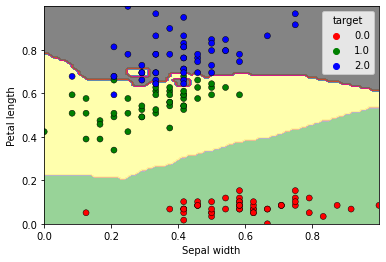

In [18]:
plot_knn(2)

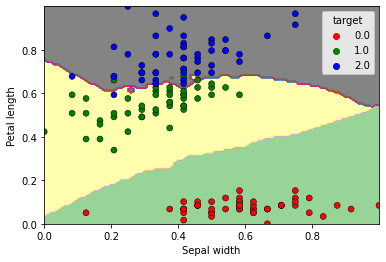

In [19]:
plot_knn(3)

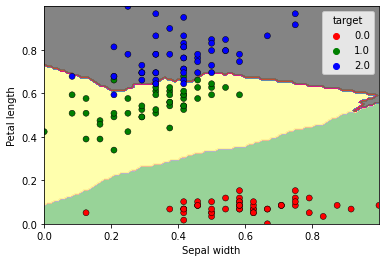

In [20]:
plot_knn(10)

### Cross-Validation
- splits data into k-folds and train the models k amount of times, rotating the training and testing sets
- each data point now being used for testing and training (more variation)

#### Without Cross Validation

In [22]:
# The limitation of a one-time train_test_split. Try to change the random_sate and 
# re-run this code to see how the accuracy_score changes.

# remember, random state = where to source the testing data when it is split -> gets a different set for each testing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=60, stratify=y)

# build model w/ the training data
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_train, y_train) 

# make prediction and evaluate accuracy
y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.8333333333333334

In [23]:
# see difference for when you change the random state
# we changed random state from 20 to 40, which affects the accuracy score
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40, stratify=y)

# build model w/ the training data
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_train, y_train) 

# make prediction and evaluate accuracy
y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.9666666666666667

### Rules for K-Values
- cannot exceed num of training rows
- usually found by getting the square root of N, where N = total num of samples
- should be an odd num. for two-class problem
- must not be a multiple of the num of classes

- find the value of k w/ highest accuracy score

####  Finding the optimal K

In [27]:
# find the average k value to get optimal k
k_values = []  # create a list to store the k-values
for i in range(1, 20):
    if i%3 !=0:    # k-value shall not be multiples of 3 beccause there are 3 classes. 
        k_values.append(i)
print(k_values)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]


#### Check Variance of Accuracy Scores w/ Different K-Values

In [28]:
k_accuracy_scores = []  # use this list to save the accuracy scores. 

for k in k_values:   # use a loop to iterate the k values. 
    from sklearn.model_selection import cross_val_score
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean()) 

# use a DataFrame to save k-values vs. each accuracy score. 
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy']) 

print(df_k_scores)
# with this result, the optimal k is 5. 

       k  accuracy
0    1.0  0.900000
1    2.0  0.886667
2    4.0  0.933333
3    5.0  0.953333
4    7.0  0.940000
5    8.0  0.940000
6   10.0  0.926667
7   11.0  0.933333
8   13.0  0.946667
9   14.0  0.946667
10  16.0  0.933333
11  17.0  0.946667
12  19.0  0.946667


#### Graph the differences

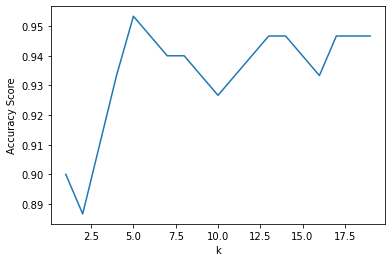

In [32]:
plt.plot(df_k_scores.loc[:, 'k'], df_k_scores.loc[:, 'accuracy'])
plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.show()